# Wine review Analysis

##  Import libraries

In [220]:
import pandas as pd
import numpy as np
import statistics 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Polygon

## Loading dataset

In [221]:
df = pd.read_csv('winemag-data_first150k.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,"This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.",Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023.",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,"Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar.",Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, and incorporates fruit from Ponzi's Aurora, Abetina and Madrona vineyards, among others. Aromatic, dense and toasty, it deftly blends aromas and flavors of toast, cigar box, blackberry, black cherry, coffee and graphite. Tannins are polished to a fine sheen, and frame a finish loaded with dark chocolate and espresso. Drink now through 2032.",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named after the highest point in the vineyard at 1200 feet. It has structure, density and considerable acidity that is still calming down. With 18 months in wood, the wine has developing an extra richness and concentration. Produced by the Tari family, formerly of Château Giscours in Margaux, it is a wine made for aging. Drink from 2020.",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


# Data Wrangling

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [223]:
#Checking for duplicates
sum(df.duplicated())

0

In [224]:
#checking amount of null values
def null_val(dataset):
    columns = list(dataset)
    for col in columns: 
        if sum(dataset[col].isnull()) != 0:
            print(col, sum(dataset[col].isnull()))

null_val(df)

country 5
designation 45735
price 13695
province 5
region_1 25060
region_2 89977


In [225]:
#checking data type of all columns
def get_class(dataset):
    columns = list(dataset)
    for column in columns:
        dtype = type(dataset[column][0])
        print(column, dtype)
    
get_class(df)

#no changes needed

Unnamed: 0 <class 'numpy.int64'>
country <class 'str'>
description <class 'str'>
designation <class 'str'>
points <class 'numpy.int64'>
price <class 'numpy.float64'>
province <class 'str'>
region_1 <class 'str'>
region_2 <class 'str'>
variety <class 'str'>
winery <class 'str'>


In [226]:
#shape of dataset
print('the dataset has', df.shape[0], 'rows and', df.shape[1], 'columns')

the dataset has 150930 rows and 11 columns


In [227]:
#summary statistic about numeric variables in dataset
df.describe()

#Ratings all between 80 and 100. 
#Prices from 4 to 2300, while 75% of the prices are equal or 
#less to 40, huge variance in the dataset

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [228]:
#Check the country variables
df.country.value_counts()

#Most vines are from the famous wine regions of the world

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
Luxembou

In [229]:
#Check the variety variables (grape type)
df.variety.value_counts()

#There are many different grape types in the data set

Chardonnay                       14482
Pinot Noir                       14291
Cabernet Sauvignon               12800
Red Blend                        10062
Bordeaux-style Red Blend          7347
Sauvignon Blanc                   6320
Syrah                             5825
Riesling                          5524
Merlot                            5070
Zinfandel                         3799
Sangiovese                        3345
Malbec                            3208
White Blend                       2824
Rosé                              2817
Tempranillo                       2556
Nebbiolo                          2241
Portuguese Red                    2216
Sparkling Blend                   2004
Shiraz                            1970
Corvina, Rondinella, Molinara     1682
Rhône-style Red Blend             1505
Pinot Gris                        1365
Barbera                           1365
Cabernet Franc                    1363
Sangiovese Grosso                 1346
Pinot Grigio             

In [230]:
#Check out designation variable
df.designation.value_counts()

#Here it seems that little bit of research is needed
#Are there Spelling mistakes and titles need to be replaced?

Reserve                                     2752
Reserva                                     1810
Estate                                      1571
Barrel sample                               1326
Riserva                                      754
Barrel Sample                                639
Brut                                         624
Crianza                                      503
Estate Grown                                 449
Estate Bottled                               396
Dry                                          374
Old Vine                                     331
Gran Reserva                                 330
Brut Rosé                                    248
Extra Dry                                    244
Vieilles Vignes                              225
Bien Nacido Vineyard                         195
Rosé                                         180
Late Bottled Vintage                         171
Réserve                                      166
Late Harvest        

In [231]:
#checkout province variable
df.province.value_counts()

California                                44508
Washington                                 9750
Tuscany                                    7281
Bordeaux                                   6111
Northern Spain                             4892
Mendoza Province                           4742
Oregon                                     4589
Burgundy                                   4308
Piedmont                                   4093
Veneto                                     3962
South Australia                            3004
Sicily & Sardinia                          2545
New York                                   2428
Northeastern Italy                         1982
Loire Valley                               1786
Alsace                                     1680
Marlborough                                1655
Southwest France                           1601
Central Italy                              1530
Southern Italy                             1439
Champagne                               

In [232]:
#checkout province variable
df.winery.value_counts()

Williams Selyem                          374
Testarossa                               274
DFJ Vinhos                               258
Chateau Ste. Michelle                    225
Columbia Crest                           217
Kendall-Jackson                          216
Concha y Toro                            216
Trapiche                                 205
Bouchard Père & Fils                     203
Kenwood                                  191
Joseph Drouhin                           189
De Loach                                 189
Georges Duboeuf                          188
Cameron Hughes                           172
Wines & Winemakers                       169
Albert Bichot                            167
Robert Mondavi                           166
Louis Latour                             154
D'Arenberg                               153
Morgan                                   153
Dry Creek Vineyard                       153
Concannon                                151
Martin Ray

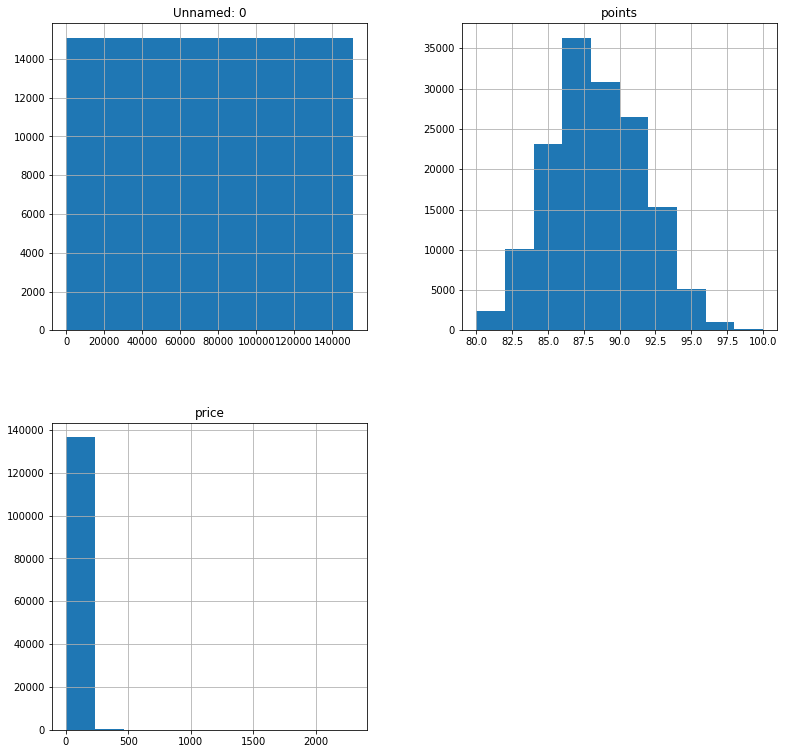

In [233]:
df.hist(figsize=(13,13));

# Assessing Data 

## Quality
- Unnamed: 0 column is not needed
- Designation coumn shows similar entries with different spelling
- Prices from 4 to 2'300, while 75% of the prices are equal or less to 40, huge variance in the dataset
- There are many countries, designations, wineries and provices, which only appear once
- There are 53'079 duplicates in the dataset 
- There are 13'695 rows with null values for price 
- There are 5 rows will null values for province and country
- There are 25'060 null values in region 1 and 89'977 null values in region 2

# Cleaning Data

In [234]:
#droping unwanted column 
df.drop('Unnamed: 0', axis=1, inplace=True)

In [235]:
# Designation: https://winefolly.com/tutorial/reserve-wine-well-depends/
#despite designation terms sound similar, the differences are not due to language, so they cannot be
#summarized

In [236]:
#dropping duplicaets
df.drop_duplicates(inplace=True)
df.shape

(97851, 10)

In [237]:
#checking again for null values after deleting duplicates
null_val(df)

country 3
designation 29896
price 8720
province 3
region_1 15932
region_2 58360


In [238]:
#check columns with 
df[df['country'].isnull()]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1133,NaN,"Delicate white flowers and a spin of lemon peel on the nose start this refined white. The bright fruit on the palate is tropical and exotic, but the minerality gives it lift. Fuller-bodied but poised, the wine has aging potential and a food-friendly character.",Askitikos,90,17.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon and 10% Merlot, this inky garnet-colored wine offers aromas of cassis and elderberry. On the palate, there is a combination of cooked fruit and cool spice flavors yet there is no lack of accompanying acidity. Flavors of cassis, elderberry, anise, orange peel and vanilla are backed by silky tannins that stay smooth into the cooling finish.",Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,NaN,"From first sniff to last, the nose never makes much of an impression; the wine has funk and generic chemical aromas but also your basic red apple and char. Pretty big and aggressive in the mouth, with snaggy acids and rough tannins.",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas


In [239]:
#Fill out missing information with google

#http://www.tsililis.gr/english/page.aspx?id=1046&cat=3
df.loc[[1133],'country'] = 'Greece'
#http://www.buyulubag.com/eng/
df.loc[[1440],'country'] = 'Turkey'
#http://chilcaswines.com/home/
df.loc[[68226],'country'] = 'Chile'

#all others information can not be recovered 

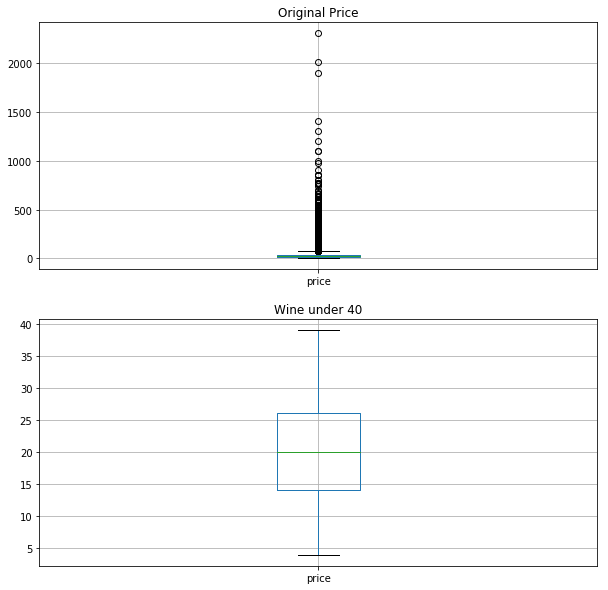

In [240]:
#checking distribution of price variable with boxplot
df_price_40 = df.query('price < 40')

#https://stackoverflow.com/questions/14770735/changing-figure-size-with-subplots/14770827
f, axs = plt.subplots(2,2,figsize=(10,10))

#creating 2 plots and plotting first with original df
plt.subplot(2, 1, 1)
df.boxplot(column='price');
plt.title('Original Price')

#2nd plot with wine under 40
plt.subplot(2, 1, 2)
df_price_40.boxplot(column='price');
plt.title('Wine under 40')

#adjust heightspace between the datasets
plt.subplots_adjust(hspace = 0.2)
plt.show()

#since most of the data (75%) show prices below or equal to 40
#a 2nd dataframe df_price_40 was created

# Data Analysis

## Questions to answer:

- Which countries have the most wine in the data set?
- Which countries produce the best wine in average?
- Which province produces the best wine within a country?

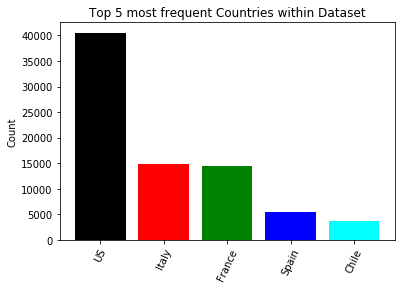

In [287]:
def get_top_5_value_counts(dataframe, col):
    full_dic = {}
    for index, value in zip(dataframe[col].value_counts().index, dataframe[col].value_counts()):
        full_dic[index] = value
    df_full_dic = pd.DataFrame.from_dict(full_dic, orient='index', columns=['count'])
    df_full_dic = df_full_dic.reset_index()
    df_full_dic = df_full_dic.rename(columns={'index' : col})
    df_full_dic_top5 = df_full_dic.iloc[:5,:]
    chart = plt.bar(df_full_dic_top5[col], df_full_dic_top5['count'], color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.xticks(rotation=65)
    plt.ylabel('Count')
    if col[-1] == 'y':
        col = col[:-1]+'ies'
    else:
        col = col+'s'
    plt.title('Top 5 most frequent ' + col.title() + ' within Dataset')
    return plt.show()    


get_top_5_value_counts(df, 'country')

#.plot(kind='bar')
#plt.xlabel(df[])
#df.plot()

In [242]:
vine_list

{'Pinot Noir': 9283,
 'Chardonnay': 9163,
 'Cabernet Sauvignon': 8272,
 'Red Blend': 6485,
 'Bordeaux-style Red Blend': 5176,
 'Sauvignon Blanc': 4037,
 'Syrah': 3663,
 'Riesling': 3585,
 'Merlot': 3178,
 'Zinfandel': 2409,
 'Sangiovese': 2153,
 'Malbec': 1968,
 'Rosé': 1910,
 'White Blend': 1858,
 'Tempranillo': 1622,
 'Portuguese Red': 1441,
 'Nebbiolo': 1339,
 'Sparkling Blend': 1315,
 'Shiraz': 1254,
 'Corvina, Rondinella, Molinara': 1118,
 'Rhône-style Red Blend': 1046,
 'Pinot Gris': 899,
 'Cabernet Franc': 883,
 'Sangiovese Grosso': 870,
 'Viognier': 859,
 'Bordeaux-style White Blend': 856,
 'Pinot Grigio': 831,
 'Champagne Blend': 811,
 'Grüner Veltliner': 715,
 'Port': 707,
 'Gewürztraminer': 681,
 'Barbera': 635,
 'Portuguese White': 620,
 'Petite Sirah': 584,
 'Carmenère': 496,
 'Tempranillo Blend': 485,
 'Chenin Blanc': 457,
 'Grenache': 390,
 'Gamay': 373,
 'Albariño': 365,
 'Prosecco': 354,
 'Glera': 342,
 'Pinot Blanc': 335,
 'Moscato': 325,
 "Nero d'Avola": 318,
 'Rhône

In [185]:
vine_list= {}

for index, value in zip(df.variety.value_counts().index, df.variety.value_counts()):
    vine_list[index] = value

vine_list2 = pd.DataFrame.from_dict(vine_list, orient='index', columns=['count'])
vine_list2 = vine_list2.reset_index()
vine_list2 = vine_list2.rename(columns={'index' : 'grape'})
vine_list2
#pd.DataFrame(d.items(), columns=['Date', 'DateValue'])
#pd.DataFrame({'date' : dict_dates.keys() , 'date_value' : dict_dates.values() })

,grape,count
0,Pinot Noir,9283
1,Chardonnay,9163
2,Cabernet Sauvignon,8272
3,Red Blend,6485
4,Bordeaux-style Red Blend,5176


In [150]:
vine_more_100 = []
for key, value in vine_list.items():
    if value > 100:
        vine_more_100.append(key)

In [151]:
vine_more_100

['Pinot Noir',
 'Chardonnay',
 'Cabernet Sauvignon',
 'Red Blend',
 'Bordeaux-style Red Blend',
 'Sauvignon Blanc',
 'Syrah',
 'Riesling',
 'Merlot',
 'Zinfandel',
 'Sangiovese',
 'Malbec',
 'Rosé',
 'White Blend',
 'Tempranillo',
 'Portuguese Red',
 'Nebbiolo',
 'Sparkling Blend',
 'Shiraz',
 'Corvina, Rondinella, Molinara',
 'Rhône-style Red Blend',
 'Pinot Gris',
 'Cabernet Franc',
 'Sangiovese Grosso',
 'Viognier',
 'Bordeaux-style White Blend',
 'Pinot Grigio',
 'Champagne Blend',
 'Grüner Veltliner',
 'Port',
 'Gewürztraminer',
 'Barbera',
 'Portuguese White',
 'Petite Sirah',
 'Carmenère',
 'Tempranillo Blend',
 'Chenin Blanc',
 'Grenache',
 'Gamay',
 'Albariño',
 'Prosecco',
 'Glera',
 'Pinot Blanc',
 'Moscato',
 "Nero d'Avola",
 'Rhône-style White Blend',
 'Garnacha',
 'Aglianico',
 'Torrontés',
 'Garganega',
 'Verdejo',
 'Meritage',
 'Dolcetto',
 'Cabernet Blend',
 'Primitivo',
 'Sauvignon',
 'Montepulciano',
 'Cabernet Sauvignon-Merlot',
 'Petit Verdot',
 'Sémillon',
 'Tinta

In [152]:
df.groupby(['country','variety'])['points'].mean()

country    variety                          
Albania    Kallmet                              88.000000
Argentina  Barbera                              85.000000
           Bonarda                              86.300000
           Bordeaux-style Red Blend             89.151515
           Bordeaux-style White Blend           83.000000
           Cabernet Blend                       89.400000
           Cabernet Franc                       87.842105
           Cabernet Sauvignon                   85.495108
           Cabernet Sauvignon-Cabernet Franc    84.000000
           Cabernet Sauvignon-Malbec            87.240000
           Cabernet Sauvignon-Merlot            86.727273
           Cabernet Sauvignon-Shiraz            87.000000
           Cabernet Sauvignon-Syrah             84.000000
           Cabernet-Syrah                       88.000000
           Champagne Blend                      84.000000
           Chardonnay                           84.265018
           Chardonnay-Sauvi

In [127]:
df_wine_100 = df[df.variety.isin(vine_more_100)]

In [202]:
df.groupby(['country'])['designation'].value_counts()

country    designation                            
Argentina  Reserva                                    340
           Reserve                                    236
           Oak Cask                                    60
           Broquel                                     58
           Estate                                      57
           Gran Reserva                                53
           Trumpeter                                   50
           Grand Reserve                               47
           Estate Bottled                              46
           Don David Reserve                           40
           Saurus Patagonia Select                     39
           Premium                                     36
           Finca La Linda                              32
           Altosur                                     31
           Catena Alta                                 31
           Famiglia Bianchi                            28
           Q         